In [1]:
import torch

In [2]:
print(torch.__version__)

1.8.1+cpu


In [19]:
import platform
import sys

# 查询Python版本
python_version = sys.version
short_version = sys.version.split()[0]  # 简化的版本号

# 查询操作系统内核
os_name = platform.system()
is_linux = os_name == 'Linux'
is_windows = os_name == 'Windows'
architecture = platform.architecture()[0]  # 32位/64位

# 打印结果
print(f"Python完整版本: {python_version}")
print(f"Python主版本: {short_version}")
print(f"操作系统类型: {os_name}")
print(f"是否为Linux: {'是' if is_linux else '否'}")
print(f"是否为Windows: {'是' if is_windows else '否'}")
print(f"系统架构: {architecture}")
print(f"详细平台信息: {platform.platform()}")

print("Python 路径:", sys.executable)
print("Python 版本:", sys.version)

Python完整版本: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Python主版本: 3.9.7
操作系统类型: Windows
是否为Linux: 否
是否为Windows: 是
系统架构: 64bit
详细平台信息: Windows-10-10.0.26100-SP0
Python 路径: D:\Download\anaconda\python.exe
Python 版本: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [6]:
import torch
import torch_geometric
import googledrivedownloader

print(f"PyTorch: {torch.__version__}")
print(f"PyTorch Geometric: {torch_geometric.__version__}")

PyTorch: 1.8.1+cpu
PyTorch Geometric: 1.7.2


In [8]:
!pip install googledrivedownloader==0.4 #在Jupyter中可用!号执行命令；适配的是版本0.4，版本太高会报错
from torch_geometric.datasets import KarateClub

D:\Download\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\Download\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [10]:
dataset = KarateClub()
data=dataset[0]
print(data)
#x=【点数量，每个点的维度】；edgeindex=[两点为一组产生边，边的个数],y是点的标签数量，trainmask训练数

Data(edge_index=[2, 156], train_mask=[34], x=[34, 34], y=[34])


In [11]:
edge_index=data.edge_index
print(edge_index.t())

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

In [10]:
x_data=[1.0,2.0,3.0]
y_data=[2.0,4.0,6.0]

#w是tensor类型
w=torch.Tensor([1.0])
w.requires_grad=True

def forward(x):
    #x会被自动转换类型，变成tensor
    return x*w
#计算损失函数，loss=(x*w-y)^2
def loss(x,y):
    y_pred =forward(x)
    return (y_pred -y)**2
print("predict1",4,forward(4).item())
for epoch in range(100):
    for x,y in zip(x_data,y_data):
        l=loss(x,y)
        l.backward()
        print('\tgrad:',x,y,w.grad.item())
        w.data=w.data-0.01*w.grad.data
        w.grad.data.zero_()
    print("progress:",epoch,l.item())
print("predict2",4,forward(4).item())

predict1 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.840000152587891
	grad: 3.0 6.0 -16.228801727294922
progress: 0 7.315943717956543
	grad: 1.0 2.0 -1.478623867034912
	grad: 2.0 4.0 -5.796205520629883
	grad: 3.0 6.0 -11.998146057128906
progress: 1 3.9987640380859375
	grad: 1.0 2.0 -1.0931644439697266
	grad: 2.0 4.0 -4.285204887390137
	grad: 3.0 6.0 -8.870372772216797
progress: 2 2.1856532096862793
	grad: 1.0 2.0 -0.8081896305084229
	grad: 2.0 4.0 -3.1681032180786133
	grad: 3.0 6.0 -6.557973861694336
progress: 3 1.1946394443511963
	grad: 1.0 2.0 -0.5975041389465332
	grad: 2.0 4.0 -2.3422164916992188
	grad: 3.0 6.0 -4.848389625549316
progress: 4 0.6529689431190491
	grad: 1.0 2.0 -0.4417421817779541
	grad: 2.0 4.0 -1.7316293716430664
	grad: 3.0 6.0 -3.58447265625
progress: 5 0.35690122842788696
	grad: 1.0 2.0 -0.3265852928161621
	grad: 2.0 4.0 -1.2802143096923828
	grad: 3.0 6.0 -2.650045394897461
progress: 6 0.195076122879982
	grad: 1.0 2.0 -0.24144840240478516
	grad: 2.0 4.0 -0.94647789

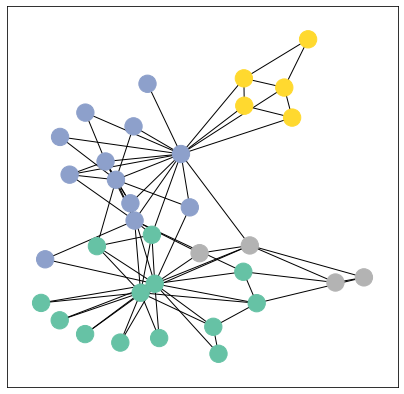

In [17]:
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
G=to_networkx(data,to_undirected=True)
def visualize_graph(G,color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G,pos=nx.spring_layout(G,seed=42),with_labels=False,
                    node_color=color,cmap="Set2")
    plt.show()

visualize_graph(G,color=data.y)

In [29]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.convl = GCNConv(dataset.num_features,4)# 输入34维向量，每个点得到四维向量
        self.conv2 =GCNConv(4,4)#输入4输出4
        self.conv3 = GCNConv(4,2)#输入4输出2
        self.classifier =Linear(2,dataset.num_classes)#输入2得到4类别
    def forward(self, x,edge_index):
        h= self.convl(x,edge_index)#输入特征与邻接矩阵(注意格式，上面那种)
        h= h.tanh()
        h= self.conv2(h, edge_index)
        h = h.tanh()
        h= self.conv3(h, edge_index)
        h = h.tanh()
        # 分类层
        out = self.classifier(h)#全连接层
        #输出最后得到的中间结果，GCNConv(4,2)中的二维向量
        return out,h 
model=GCN()
print(model)

GCN(
  (convl): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


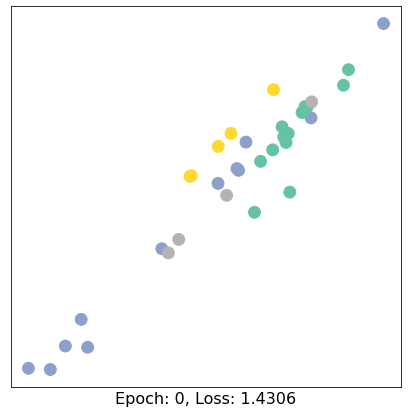

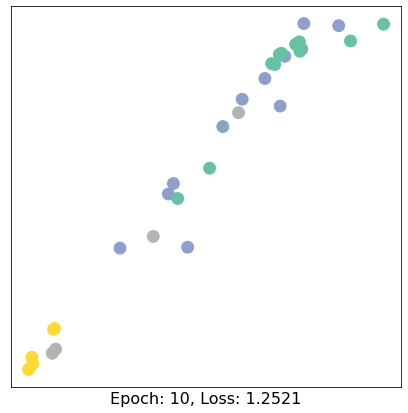

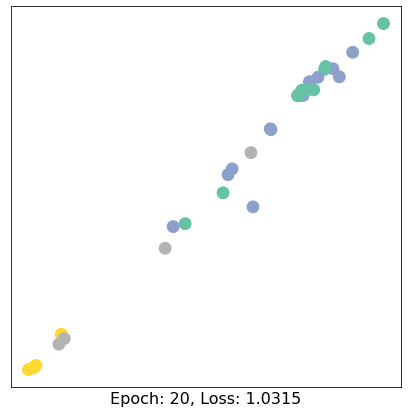

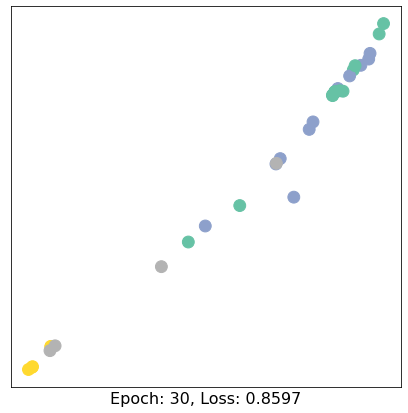

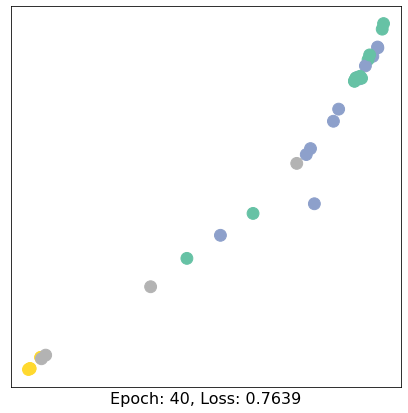

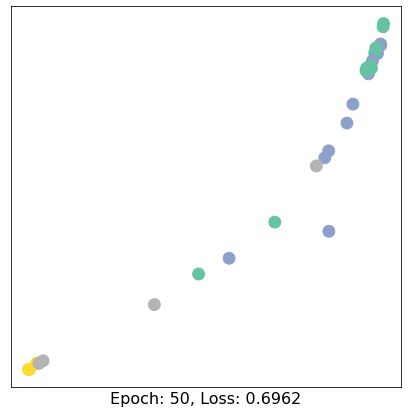

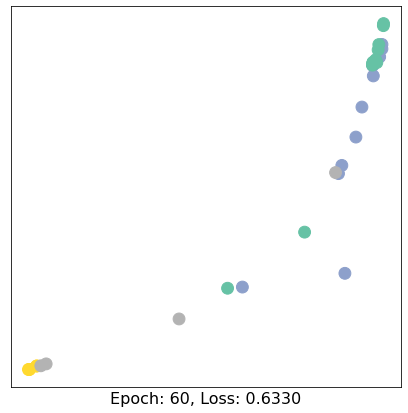

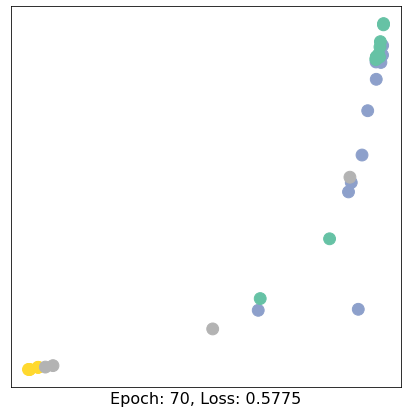

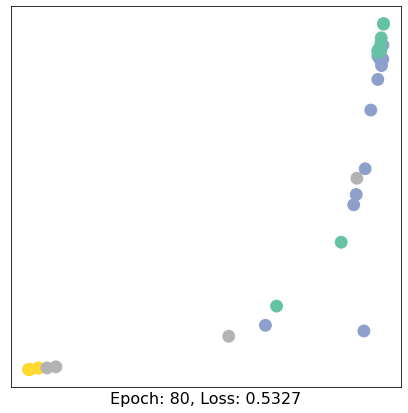

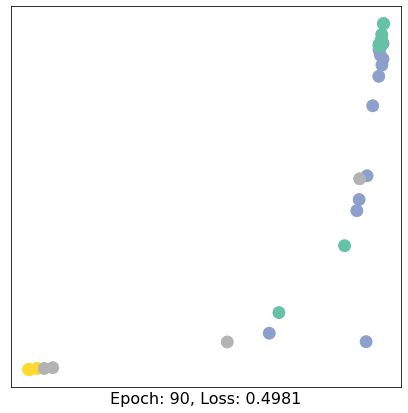

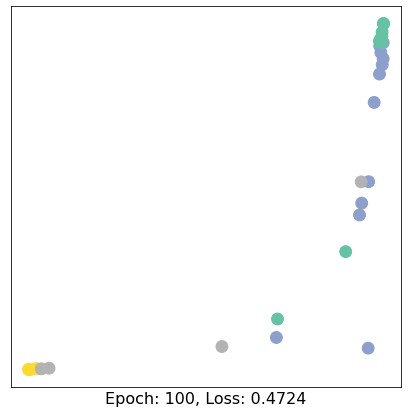

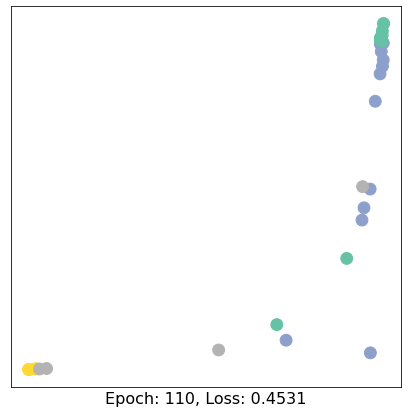

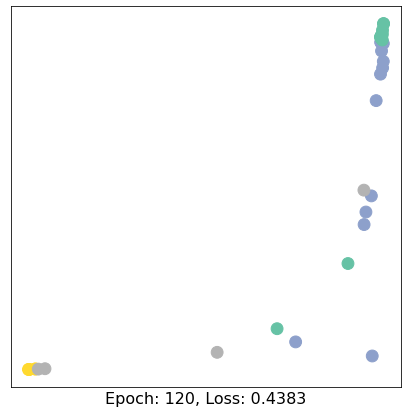

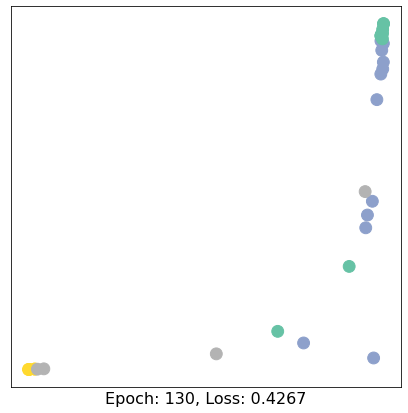

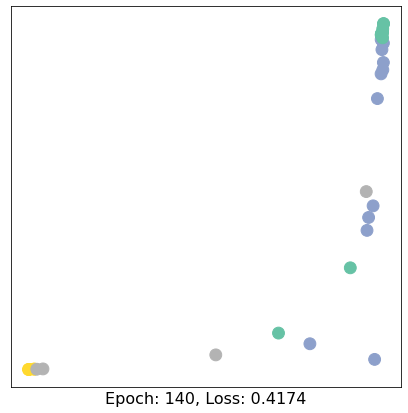

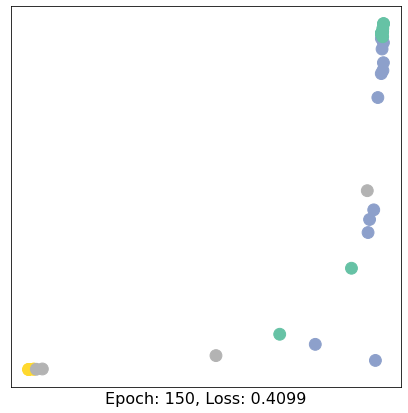

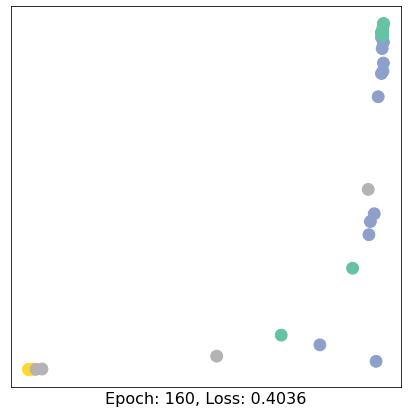

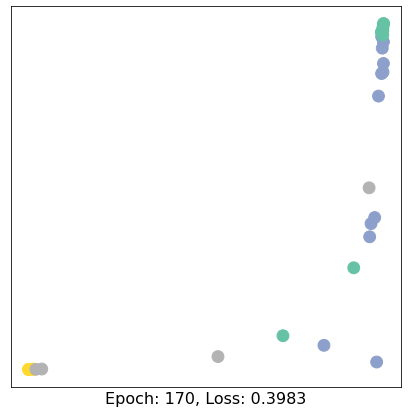

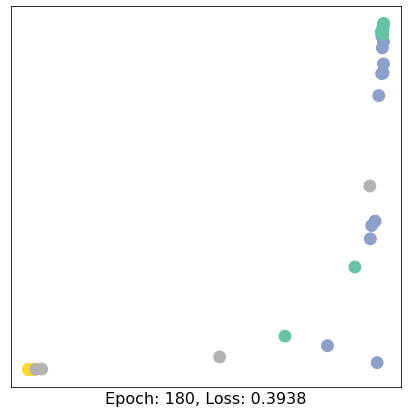

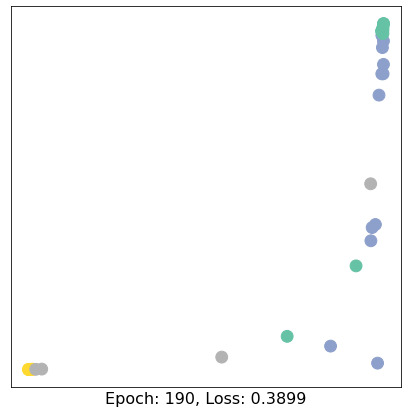

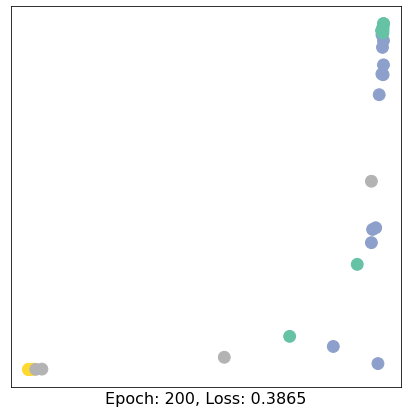

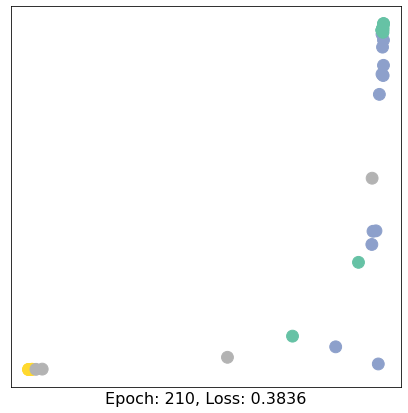

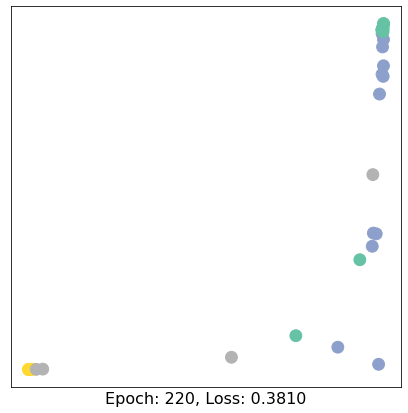

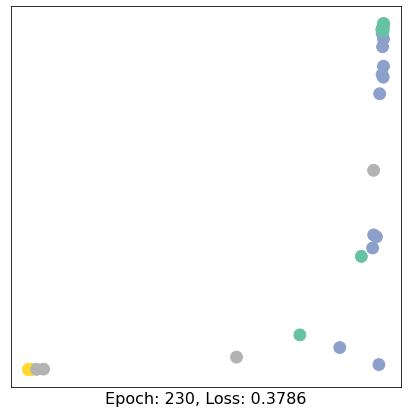

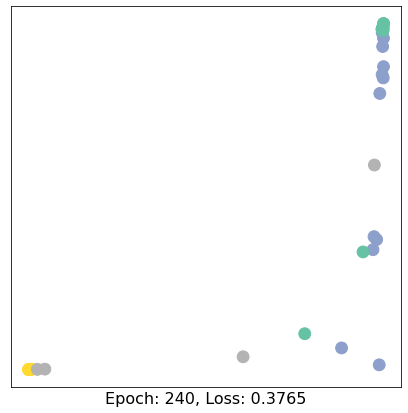

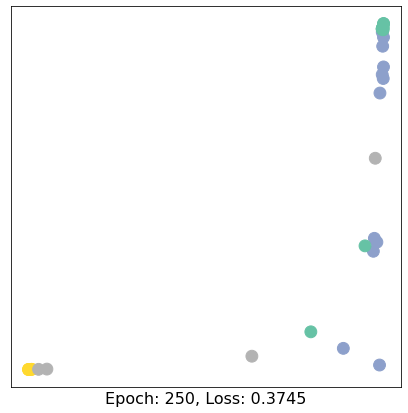

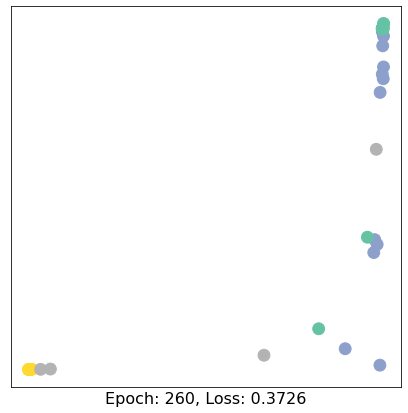

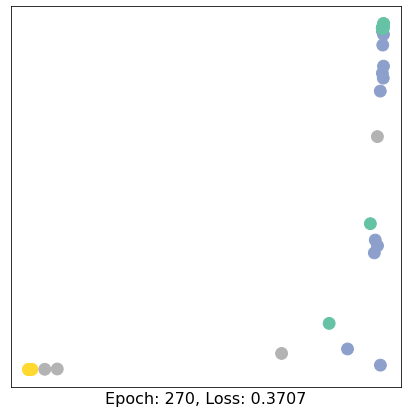

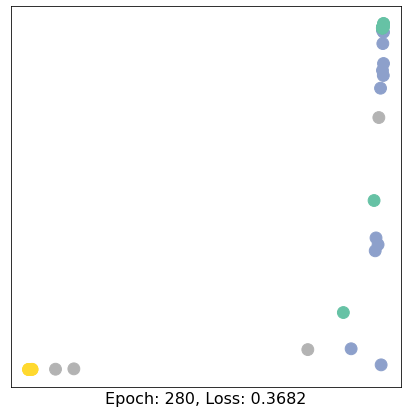

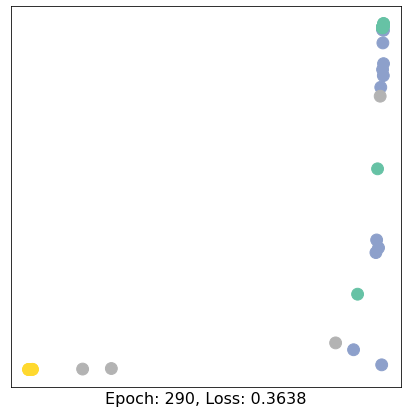

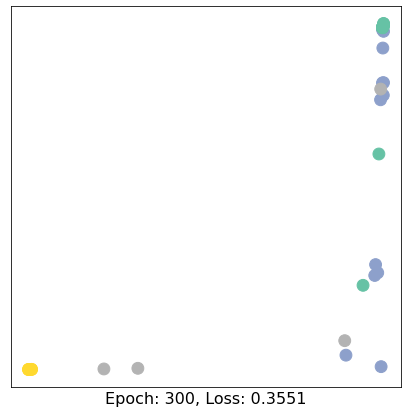

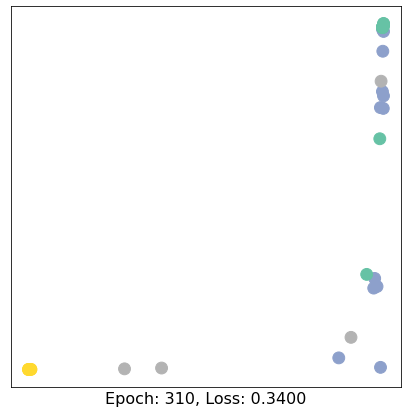

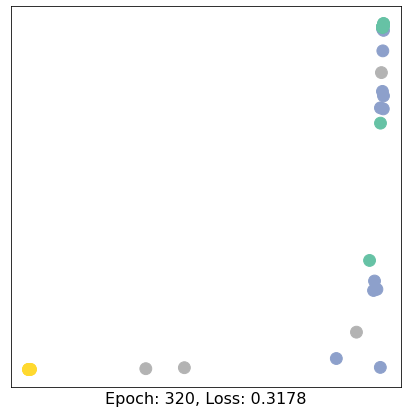

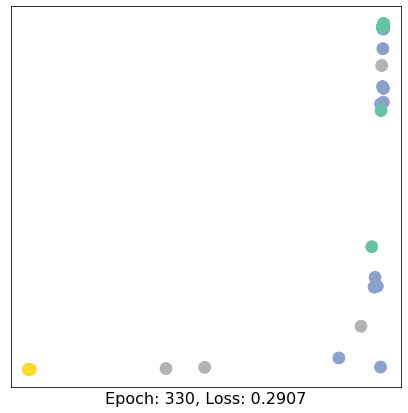

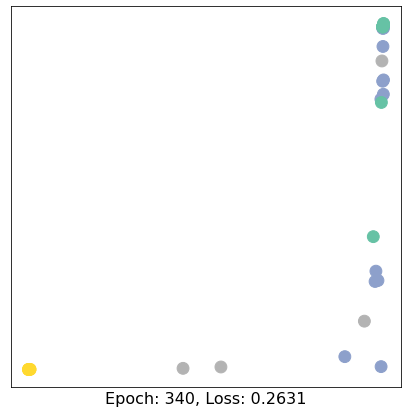

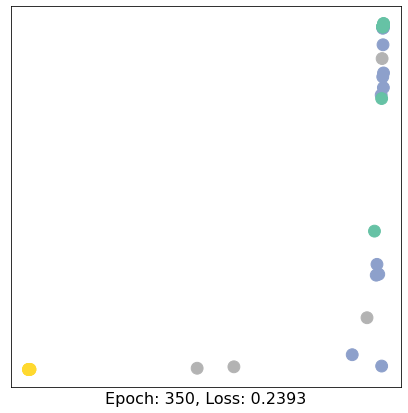

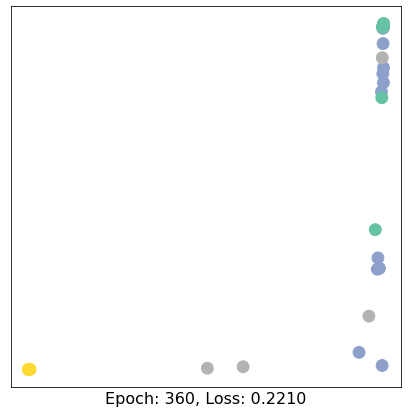

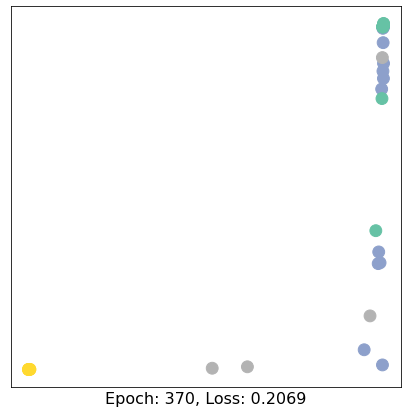

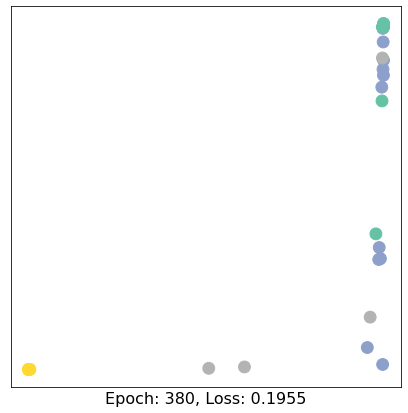

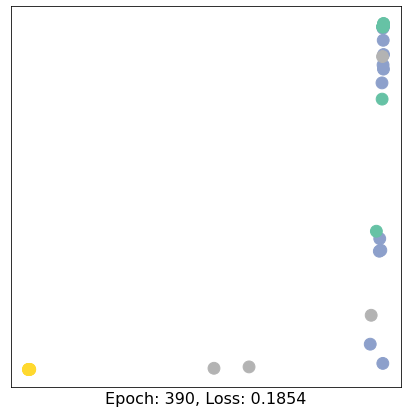

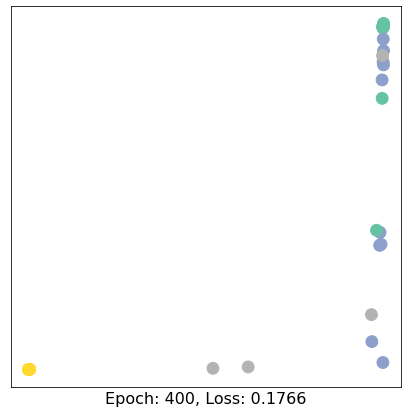

In [30]:
import time
model=GCN()
criterion =torch.nn.CrossEntropyLoss()# Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)# Define optimizer.

def train(data):
    optimizer.zero_grad()#梯度清零
    out,h = model(data.x,data.edge_index)#h是两维向量
    loss = criterion(out[data.train_mask],data.y[data.train_mask])# semi-supervised半监督
    loss.backward()
    optimizer.step()
    return loss,h

def visualize_embedding(h,color,epoch=None,loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h= h.detach().cpu().numpy()
    plt.scatter(h[:,0],h[:,1],s=140,c=color,cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}',fontsize=16)
    plt.show()
for epoch in range(401):
    loss,h= train(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

In [39]:
import torch
from torch_geometric.data import Data
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import numpy as np

# 初始化R环境
phytools = importr('phytools')
ape = importr('ape')

def generate_tree_in_r(n_tips=128, birth=0.1):
    """在R中生成发育树并提取关键信息"""
    r_code = f"""
    tree <- phytools::pbtree(
        birth = {birth}, 
        n = {n_tips}, 
        type = "extinct",
        extant.only = TRUE,
        quiet = TRUE
    )
    
    # 获取边信息
    edge_matrix <- tree[["edge"]]
    edge_lengths <- tree[["edge.length"]]
    tip_labels <- tree[["tip.label"]]
    node_labels <- tree[["node.label"]]
    
    # 获取节点时间（从根到叶）
    heights <- ape::node.depth.edgelength(tree)
    
    list(
        edge_index = edge_matrix,
        edge_lengths = edge_lengths,
        tip_labels = tip_labels,
        node_labels = node_labels,
        node_heights = heights
    )
    """
    return ro.r(r_code)

def r_tree_to_pyg(r_tree, add_features=True):
    """
    将R中生成的树转换为PyTorch Geometric的Data对象
    
    参数:
        r_tree: R返回的树对象
        add_features: 是否添加节点特征
        
    返回:
        data: PyG Data对象
    """
    # 1. 准备边索引 (edge_index)
    edge_matrix = np.array(r_tree.rx('edge_index')[0])
    edge_index = torch.tensor(edge_matrix.T - 1, dtype=torch.long)  # R索引从1开始，Python从0
    
    # 2. 边属性 (edge_lengths)
    edge_lengths = np.array(r_tree.rx('edge_lengths')[0])
    edge_attr = torch.tensor(edge_lengths, dtype=torch.float)
    
    # 3. 节点信息
    n_tips = len(r_tree.rx('tip_labels')[0])
    n_nodes = edge_matrix.max()  # 节点总数
    
    # 4. 节点高度（进化时间）
    heights = np.array(r_tree.rx('node_heights')[0])
    max_height = heights.max()
    
    # 5. 创建节点特征矩阵
    x = torch.zeros(n_nodes, 3, dtype=torch.float)
    
    if add_features:
        # 特征1: 节点高度（标准化）
        x[:, 0] = torch.tensor(heights / max_height)
        
        # 特征2: 是否为叶节点 (1=叶节点, 0=内部节点)
        is_leaf = torch.zeros(n_nodes, dtype=torch.float)
        is_leaf[:n_tips] = 1.0
        x[:, 1] = is_leaf
        
        # 特征3: 节点度（连接数）
        degrees = torch.zeros(n_nodes, dtype=torch.float)
        for i in range(n_nodes):
            degrees[i] = (edge_index[0] == i).sum()  # 出度
        x[:, 2] = degrees / degrees.max()
    
    # 6. 创建Data对象
    return Data(
        x=x,
        edge_index=edge_index,
        edge_attr=edge_attr,
        num_nodes=n_nodes
    )

# 在R中生成树
r_tree = generate_tree_in_r(n_tips=128, birth=0.1)

# 转换为PyG格式
data = r_tree_to_pyg(r_tree)

print("PyG Data对象信息:")
print(f"节点数: {data.num_nodes}")
print(f"边数: {data.num_edges}")
print(f"节点特征维度: {data.x.shape}")
print(f"边索引维度: {data.edge_index.shape}")
print(f"边属性维度: {data.edge_attr.shape}")
print("\n边索引示例 (前5条):")
print(data.edge_index[:, :5])
print("\n边长度示例 (前5条):")
print(data.edge_attr[:5])
print("\n节点特征示例 (前5个):")
print(data.x[:5])

PyG Data对象信息:
节点数: 255
边数: 254
节点特征维度: torch.Size([255, 3])
边索引维度: torch.Size([2, 254])
边属性维度: torch.Size([254])

边索引示例 (前5条):
tensor([[128, 129, 129, 130, 131],
        [129,   0, 130, 131,   1]])

边长度示例 (前5条):
tensor([2.4930, 1.3292, 1.0386, 0.2609, 0.0297])

节点特征示例 (前5个):
tensor([[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.]])


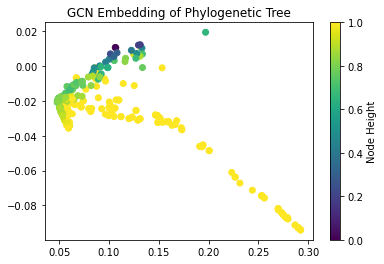

In [40]:
class PhylogeneticGCN(torch.nn.Module):
    def __init__(self, num_features, hidden_dim=16):
        super().__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.conv3 = GCNConv(hidden_dim, 2)  # 输出2维嵌入用于可视化
        
    def forward(self, x, edge_index, edge_weight=None):
        h = self.conv1(x, edge_index, edge_weight).relu()
        h = self.conv2(h, edge_index, edge_weight).relu()
        h = self.conv3(h, edge_index, edge_weight)
        return h

# 创建模型
model = PhylogeneticGCN(num_features=data.num_features)

# 前向传播 (使用边长度作为权重)
embeddings = model(data.x, data.edge_index, edge_weight=data.edge_attr)

# 可视化二维嵌入
plt.scatter(embeddings[:,0].detach().numpy(), 
            embeddings[:,1].detach().numpy(),
            c=data.x[:,0].numpy(),  # 按节点高度着色
            cmap='viridis')
plt.colorbar(label='Node Height')
plt.title('GCN Embedding of Phylogenetic Tree')
plt.show()

In [115]:
#开始插补
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter
import rpy2.robjects.numpy2ri  # 保留导入以注册转换器

# 定义模拟参数类
class Parameters:
    def __init__(self):
        self.birth = 0.1
        self.death = 0
        self.n_spp = 128
        self.lambda_val = 0.5  # 选择lambda=0.5
        self.n_traits = 5
        self.dependent = True
        self.cor_traits = 0.5
        self.noNA = 0.05  # 缺失率5%
        self.withpvr = 1
        self.pvr_opt = 0.95  # 选择PVR保留95%的主成分
# 创建参数对象
parameters = Parameters()

geiger = importr('geiger')
ape = importr('ape')
phytools = importr('phytools')
PVR = importr('PVR')
missForest = importr('missForest')

def simulate_tree_and_traits(parameters):
    r_code = f"""
    # 模拟系统发育树
    set.seed(42)
    my_tree <- geiger::drop.extinct(geiger::sim.bdtree(
        b = {parameters.birth}, 
        d = {parameters.death}, 
        stop = "taxa", 
        n = {parameters.n_spp}, 
        extinct = FALSE
    ))
    my_tree$tip.label <- sprintf("Sp_%.4d", 1:length(my_tree$tip.label))
    my_tree <- ape::makeNodeLabel(my_tree, method = "number", prefix = "Node")
    
    # 树变换
    if({parameters.lambda_val} <= 1) {{
        my_tree.lambda <- phytools::rescale(my_tree, model = "lambda", {parameters.lambda_val})
    }} else {{
        my_tree.lambda <- ape::compute.brlen(my_tree, method = "Grafen", power = {parameters.lambda_val})
    }}
    
    # 模拟性状
    trait <- sapply(seq_len({parameters.n_traits}), function(x) phytools::fastBM(my_tree.lambda))
    colnames(trait) <- paste0("t.", 1:{parameters.n_traits})
    
    # 模拟性状相关性
    if({1 if parameters.dependent else 0} && {parameters.n_traits} > 1) {{
        mc <- matrix({parameters.cor_traits}, {parameters.n_traits}, {parameters.n_traits})
        diag(mc) <- 1
        mchol <- chol(mc)
        trait <- trait %*% mchol
        colnames(trait) <- paste0("t.", 1:{parameters.n_traits})
    }}
    
    # 引入缺失值
    traits.NA <- missForest::prodNA(trait, noNA = {parameters.noNA})
    
    # 添加PVR
    if({parameters.withpvr} == 1) {{
        x <- PVR::PVRdecomp(my_tree)
        pvrs <- x@Eigen$vectors
        eigenvalues <- x@Eigen$values
        variance_proportion <- eigenvalues / sum(eigenvalues) * 100
        
        # 计算累积解释比例
        cumulative_variance <- cumsum(variance_proportion)
        
        # 找到解释指定比例所需的轴数
        n_axes <- which(cumulative_variance >= {parameters.pvr_opt} * 100)[1]
        
        # 提取前n_axes个特征向量
        selected_eigenvectors <- pvrs[, 1:n_axes]
        traits.pvrs <- cbind(traits.NA, selected_eigenvectors)
        traits.full<-cbind(trait,selected_eigenvectors)
    }} else {{
        traits.pvrs <- traits.NA
        traits.full<-trait
    }}
    
    # 获取树结构信息
    edge_matrix <- my_tree$edge
    edge_lengths <- my_tree$edge.length
    tip_labels <- my_tree$tip.label
    node_labels <- my_tree$node.label
    heights <- ape::node.depth.edgelength(my_tree)
    
    # 返回结果
    list(
        tree = my_tree,
        traits = traits.pvrs,  # 有缺失的数据
        traits_full = traits.full,  # 无缺失的真实值
        edge_index = edge_matrix,
        edge_lengths = edge_lengths,
        tip_labels = tip_labels,
        node_labels = node_labels,
        node_heights = heights,
        n_axes = n_axes
    )
    """
    return ro.r(r_code)

# 2. 将R模拟结果转换为PyG数据对象
def r_simulation_to_pyg(r_result):
    # 提取树结构
    edge_matrix = np.array(r_result.rx('edge_index')[0])
    edge_index = torch.tensor(edge_matrix.T - 1, dtype=torch.long)  # R索引从1开始
    
    edge_lengths = np.array(r_result.rx('edge_lengths')[0])
    edge_attr = torch.tensor(edge_lengths, dtype=torch.float)
    
    n_tips = len(r_result.rx('tip_labels')[0])
    n_nodes = edge_matrix.max()
    
    heights = np.array(r_result.rx('node_heights')[0])
    max_height = heights.max()
    
    # 创建基础节点特征
    x = torch.zeros(n_nodes, 3, dtype=torch.float)
    x[:, 0] = torch.tensor(heights / max_height)  # 标准化高度
    
    is_leaf = torch.zeros(n_nodes, dtype=torch.float)
    is_leaf[:n_tips] = 1.0  # 前n_tips个节点是叶节点
    x[:, 1] = is_leaf
    
    degrees = torch.zeros(n_nodes, dtype=torch.float)
    for i in range(n_nodes):
        degrees[i] = (edge_index[0] == i).sum()
    x[:, 2] = degrees / degrees.max()
    
    # 提取性状数据（包含PVR）
    traits_observed = np.array(r_result.rx('traits')[0])  # 有缺失的数据
    traits_full = np.array(r_result.rx('traits_full')[0])  # 完整无缺失的真实值
    
    n_traits = parameters.n_traits
    n_axes = r_result.rx('n_axes')[0][0] if parameters.withpvr else 0
    
    # 创建性状张量和掩码（观察值）
    trait_data = torch.tensor(traits_observed, dtype=torch.float)
    trait_mask = torch.ones_like(trait_data)
    trait_mask[torch.isnan(trait_data)] = 0
    trait_data[torch.isnan(trait_data)] = 0  # 缺失值设为0
    
    # 完整无缺失的真实值
    trait_full = torch.tensor(traits_full, dtype=torch.float)
    
    # 创建扩展的性状矩阵
    expanded_traits = torch.zeros(n_nodes, (n_traits+n_axes))
    expanded_tmask = torch.zeros(n_nodes, (n_traits+n_axes))
    
    # 填充数据
    expanded_traits[:n_tips] = trait_data
    expanded_tmask[:n_tips] = trait_mask
    
    
    # 创建Data对象
    data = Data(
        x=x,#节点特征矩阵，标注每个节点的类型，根节点还是叶节点还是内部节点，深度等
        edge_index=edge_index,#边连接关系
        edge_attr=edge_attr,#边属性，每条边的长度
        num_nodes=n_nodes,#节点总数
        traits= expanded_traits,#形状: (n_nodes, n_traits + n_axes)
        trait_mask= expanded_tmask,#1表示未缺失值，0表示缺失值
        traits_full= trait_full,  # 完整无缺失的真实值，注意它只含叶节点数据
        n_traits=n_traits,#性状数
        n_axes=n_axes,#eigenvector数
        n_tips=n_tips
    )
    
    print(f"模拟完成: {n_tips}物种, {n_nodes}节点, {n_traits}性状, {n_axes}个PVR轴")
    print(f"缺失值比例: {1 - trait_mask[:n_tips, :n_traits].mean().item():.2f}")
    
    return data

# 3. 模拟数据
r_result = simulate_tree_and_traits(parameters)
data = r_simulation_to_pyg(r_result)
len(data.traits)

# 4. 图神经网络模型（考虑PVR）
class PhylogeneticGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_traits, n_axes):
        super().__init__()
        # 基础特征处理
        self.base_mlp = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )
        
        # 性状特征处理（包括PVR）
        self.trait_mlp = nn.Sequential(
            nn.Linear(n_traits + n_axes, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )
        
        # 组合特征处理
        self.combined_conv1 = GCNConv(hidden_dim * 2, hidden_dim)
        self.combined_conv2 = GCNConv(hidden_dim, hidden_dim)
        self.output_layer = nn.Linear(hidden_dim, n_traits)
        
    def forward(self, data):
        # 处理基础特征
        base_features = self.base_mlp(data.x)
        
        # 处理性状特征（包括PVR）
        trait_features = self.trait_mlp(data.traits)
        
        # 拼接特征
        combined_features = torch.cat([base_features, trait_features], dim=1)
        
        # 图卷积
        h = F.relu(self.combined_conv1(combined_features, data.edge_index, data.edge_attr))
        h = F.relu(self.combined_conv2(h, data.edge_index, data.edge_attr))
        
        # 输出预测（只预测原始性状，不包括PVR）
        return self.output_layer(h)

# 5. 初始化模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PhylogeneticGNN(
    input_dim=data.x.shape[1],
    hidden_dim=32,
    n_traits=parameters.n_traits,
    n_axes=data.n_axes
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)

# 将数据移到设备
data = data.to(device)

# 6. 训练模型
def train_model(model, data, epochs=500):
    model.train()
    loss_history = []
    
    for epoch in range(epochs):
        optimizer.zero_grad()
        
        # 前向传播
        pred_traits = model(data)
        
        # 计算损失（仅对原始性状的缺失值）
        loss = F.mse_loss(
            pred_traits[:parameters.n_spp, :parameters.n_traits][data.trait_mask[:parameters.n_spp, :parameters.n_traits] == 1],
            data.traits[:parameters.n_spp, :parameters.n_traits][data.trait_mask[:parameters.n_spp, :parameters.n_traits] == 1]
        )
        
        # 反向传播
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())
        
        if epoch % 50 == 0:
            print(f'Epoch {epoch:03d}, Loss: {loss.item():.4f}')
    
    return loss_history

# 训练模型
loss_history = train_model(model, data, epochs=2000)


模拟完成: 128物种, 255节点, 5性状, 63个PVR轴
缺失值比例: 0.05
Epoch 000, Loss: 43.7859
Epoch 050, Loss: 16.3573
Epoch 100, Loss: 8.6203
Epoch 150, Loss: 5.2147
Epoch 200, Loss: 3.7153
Epoch 250, Loss: 2.8454
Epoch 300, Loss: 2.0420
Epoch 350, Loss: 1.6633
Epoch 400, Loss: 1.2892
Epoch 450, Loss: 1.5737
Epoch 500, Loss: 0.8672
Epoch 550, Loss: 0.6914
Epoch 600, Loss: 1.0629
Epoch 650, Loss: 0.4794
Epoch 700, Loss: 0.7432
Epoch 750, Loss: 0.3852
Epoch 800, Loss: 0.3086
Epoch 850, Loss: 0.4751
Epoch 900, Loss: 0.3345
Epoch 950, Loss: 0.2728
Epoch 1000, Loss: 0.3133
Epoch 1050, Loss: 0.2348
Epoch 1100, Loss: 0.2930
Epoch 1150, Loss: 0.1456
Epoch 1200, Loss: 0.1513
Epoch 1250, Loss: 0.1474
Epoch 1300, Loss: 0.8247
Epoch 1350, Loss: 0.1244
Epoch 1400, Loss: 0.1535
Epoch 1450, Loss: 0.0876
Epoch 1500, Loss: 0.0793
Epoch 1550, Loss: 0.2221
Epoch 1600, Loss: 0.0528
Epoch 1650, Loss: 0.0804
Epoch 1700, Loss: 0.3785
Epoch 1750, Loss: 0.1995
Epoch 1800, Loss: 0.7053
Epoch 1850, Loss: 0.0376
Epoch 1900, Loss: 0.094

In [121]:
len(data.traits_full)

128

In [102]:
import pandas as pd

# 将张量转换为numpy数组
a = data.traits.numpy()

# 创建DataFrame
df = pd.DataFrame(a)

# 保存到CSV文件
df.to_csv('trait.csv', index_label='Row')

预测值与真实值的相关系数: 0.2391
标准化均方根误差(NRMSE): 1.0274
均方根误差(RMSE): 8.7465
平均绝对误差(MAE): 7.3823


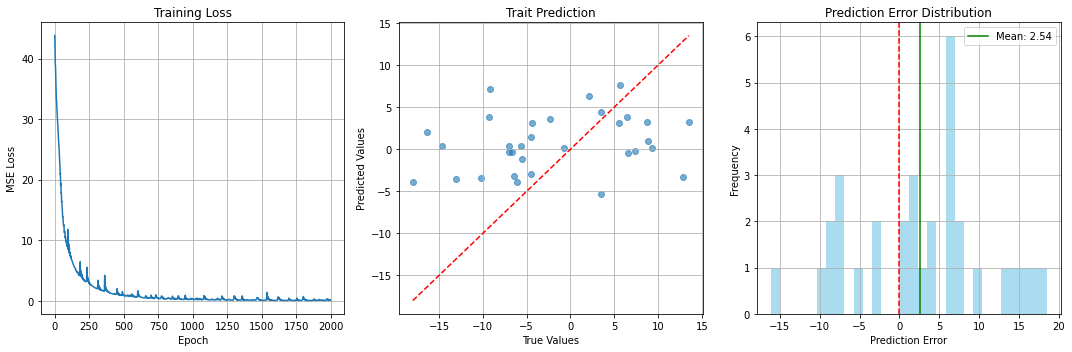


===== 综合评估报告 =====
缺失值数量: 32
真实值范围: -17.9941 - 13.5039
预测值范围: -5.3386 - 7.5911
相关系数: 0.2391
标准化均方根误差(NRMSE): 1.0274
均方根误差(RMSE): 8.7465
平均绝对误差(MAE): 7.3823


In [131]:
def evaluate_model(model, data):
    model.eval()
    with torch.no_grad():
        pred_traits = model(data)
    
    # 提取叶节点的原始性状预测
    leaf_pred = pred_traits[:data.n_tips, :parameters.n_traits].cpu().numpy()
    
    # 使用完整的真实值（无缺失）
    leaf_true = data.traits_full[:data.n_tips, :parameters.n_traits].cpu().numpy()
    
    # 获取缺失值掩码
    leaf_mask = data.trait_mask[:data.n_tips, :parameters.n_traits].cpu().numpy()
    
    # 找到缺失值位置
    missing_indices = np.where(leaf_mask == 0)
    
    if len(missing_indices[0]) == 0:
        print("没有缺失值需要预测")
        return 0.0, np.array([]), np.array([])
    
    predicted_values = leaf_pred[missing_indices]
    true_values = leaf_true[missing_indices]  # 真实的非缺失值
    
    # 计算评估指标
    nrmse = np.sqrt(np.mean((true_values - predicted_values)**2) / np.var(true_values))
    rmse = np.sqrt(np.mean((true_values - predicted_values)**2))
    mae = np.mean(np.abs(true_values - predicted_values))
    
    # 计算相关系数
    try:
        correlation = np.corrcoef(true_values, predicted_values)[0, 1]
    except:
        correlation = np.nan
    
    print(f"预测值与真实值的相关系数: {correlation:.4f}")
    print(f"标准化均方根误差(NRMSE): {nrmse:.4f}")
    print(f"均方根误差(RMSE): {rmse:.4f}")
    print(f"平均绝对误差(MAE): {mae:.4f}")
    
    return correlation, true_values, predicted_values, nrmse, rmse, mae

# 使用missForest风格的NRMSE计算
def calculate_nrmse(true_values, predicted_values):
    """计算标准化均方根误差(NRMSE)"""
    mse = np.mean((true_values - predicted_values)**2)
    var_true = np.var(true_values)
    return np.sqrt(mse / var_true) if var_true > 0 else np.nan

# 修改后的可视化函数
def visualize_results(true_values, predicted_values, loss_history):
    plt.figure(figsize=(15, 5))
    
    # 损失曲线
    plt.subplot(1, 3, 1)
    plt.plot(loss_history)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.grid(True)
    
    # 预测值与真实值对比
    if len(true_values) > 0:
        plt.subplot(1, 3, 2)
        plt.scatter(true_values, predicted_values, alpha=0.6)
        plt.plot([np.min(true_values), np.max(true_values)], 
                 [np.min(true_values), np.max(true_values)], 'r--')
        plt.title('Trait Prediction')
        plt.xlabel('True Values')
        plt.ylabel('Predicted Values')
        plt.grid(True)
        
        # 添加误差分布图
        plt.subplot(1, 3, 3)
        errors = predicted_values - true_values
        plt.hist(errors, bins=30, alpha=0.7, color='skyblue')
        plt.axvline(x=0, color='r', linestyle='--')
        plt.axvline(x=np.mean(errors), color='g', linestyle='-', label=f'Mean: {np.mean(errors):.2f}')
        plt.title('Prediction Error Distribution')
        plt.xlabel('Prediction Error')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True)
    else:
        plt.subplot(1, 3, 2)
        plt.text(0.5, 0.5, 'No Missing Values to Predict', 
                 ha='center', va='center', fontsize=12)
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.text(0.5, 0.5, 'No Missing Values to Predict', 
                 ha='center', va='center', fontsize=12)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# 重新评估模型
correlation, true_values, predicted_values, nrmse, rmse, mae = evaluate_model(model, data)

# 可视化结果
visualize_results(true_values, predicted_values, loss_history)

# 输出综合评估报告
print("\n===== 综合评估报告 =====")
print(f"缺失值数量: {len(true_values)}")
print(f"真实值范围: {np.min(true_values):.4f} - {np.max(true_values):.4f}")
print(f"预测值范围: {np.min(predicted_values):.4f} - {np.max(predicted_values):.4f}")
print(f"相关系数: {correlation:.4f}")
print(f"标准化均方根误差(NRMSE): {nrmse:.4f}")
print(f"均方根误差(RMSE): {rmse:.4f}")
print(f"平均绝对误差(MAE): {mae:.4f}")
print("="*30)